### K-Means Clustering

In [1]:
using Pkg
Pkg.installed()

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg C:\Users\paulo\AppData\Local\Programs\Julia-1.11.4\share\julia\stdlib\v1.11\Pkg\src\Pkg.jl:787


Dict{String, VersionNumber} with 8 entries:
  "CSV"           => v"0.10.15"
  "Statistics"    => v"1.11.1"
  "LinearAlgebra" => v"1.11.0"
  "IJulia"        => v"1.26.0"
  "Plots"         => v"1.40.11"
  "Random"        => v"1.11.0"
  "DataFrames"    => v"1.7.0"
  "GLM"           => v"1.9.0"

In [2]:
Pkg.add("Clustering")
Pkg.add("RDatasets")

    Updating registry at `C:\Users\paulo\.julia\registries\General.toml`
   Resolving package versions...
   Installed Distances ──────── v0.10.12
   Installed NearestNeighbors ─ v0.4.21
   Installed StaticArrays ───── v1.9.13
   Installed Clustering ─────── v0.15.8
    Updating `C:\Users\paulo\.julia\environments\v1.11\Project.toml`
  [aaaa29a8] + Clustering v0.15.8
    Updating `C:\Users\paulo\.julia\environments\v1.11\Manifest.toml`
  [aaaa29a8] + Clustering v0.15.8
  [b4f34e82] + Distances v0.10.12
  [b8a86587] + NearestNeighbors v0.4.21
  [90137ffa] + StaticArrays v1.9.13
  [1e83bf80] + StaticArraysCore v1.4.3
Precompiling project...
   1109.7 ms  ✓ Distances
   1357.4 ms  ✓ Distances → DistancesSparseArraysExt
   5002.2 ms  ✓ StaticArrays
   1381.0 ms  ✓ StaticArrays → StaticArraysStatisticsExt
   1935.9 ms  ✓ NearestNeighbors
   2456.7 ms  ✓ Clustering
  6 dependencies successfully precompiled in 13 seconds. 236 already precompiled.
   Resolving package versions...
   Installed 

In [3]:
using Clustering, RDatasets

In [4]:
df = dataset("cluster", "xclara")

Row,V1,V2
,Float64,Float64
1,2.07234,-3.24169
2,17.9367,15.7848
3,1.08358,7.31918
4,11.1207,14.4068
5,23.7115,2.55773
6,24.1699,32.0248
7,21.6658,4.89285
8,4.69368,12.3422
9,19.2119,-1.12137


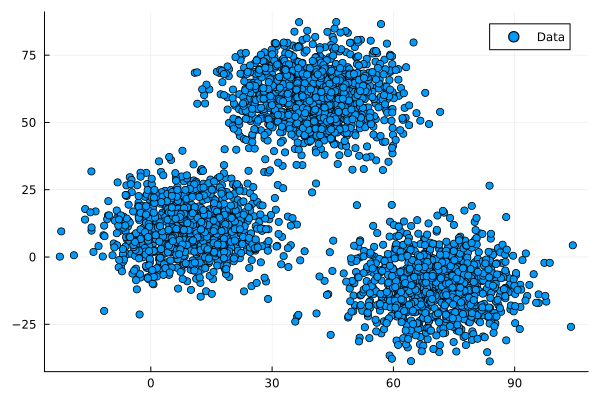

In [6]:
using Plots
scatter(df.V1, df.V2, labels="Data")

### K-Means Clustering Method

In [11]:
typeof(df)
data = copy(Matrix{Float64}(df)')

2×3000 Matrix{Float64}:
  2.07234  17.9367  1.08358  11.1207  …   64.4653   90.7228   64.8798
 -3.24169  15.7848  7.31918  14.4068     -10.5014  -12.2558  -24.8773

In [12]:
seeds = initseeds(:rand, data, 3)

3-element Vector{Int64}:
 973
 364
 980

In [13]:
data_kmeans = kmeans(data, 3)

KmeansResult{Matrix{Float64}, Float64, Int64}([40.68362784160133 9.478045899766407 69.92418447478987; 59.715892741514416 10.686052004816457 -10.119641194361344], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [248.82648673599076, 97.54633145402863, 81.80297892989307, 16.542030748810703, 268.662273841995, 671.1927708671267, 182.10199403461115, 25.632845601907206, 234.1632302622802, 256.38180079050915  …  466.72939280326045, 9.368284820777262, 133.564288058049, 226.74875462945602, 262.74319403555455, 260.77455537845526, 225.04340330959894, 29.944910600701405, 437.14658504774525, 243.23500685878025], [1149, 899, 952], [1149, 899, 952], 611605.8806933899, 3, true)

In [14]:
nclusters(data_kmeans)

3

In [15]:
counts(data_kmeans)

3-element Vector{Int64}:
 1149
  899
  952

In [16]:
df.group = assignments(data_kmeans)

3000-element Vector{Int64}:
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 ⋮
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3

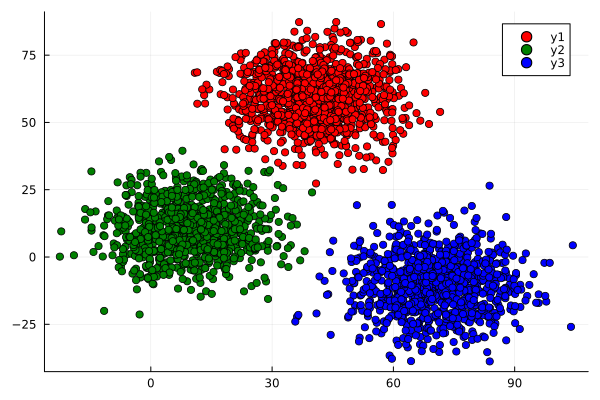

In [23]:
scatter(df[df.group .== 1, "V1"], df[df.group .== 1, "V2"], markercolor=:red)
scatter!(df[df.group .== 2, "V1"], df[df.group .== 2, "V2"], markercolor=:green)
scatter!(df[df.group .== 3, "V1"], df[df.group .== 3, "V2"], markercolor=:blue)